c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed t

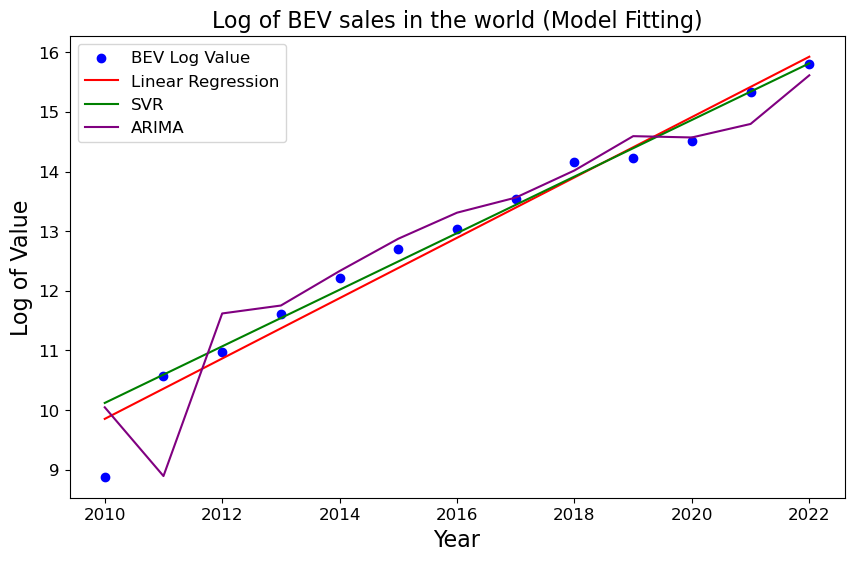

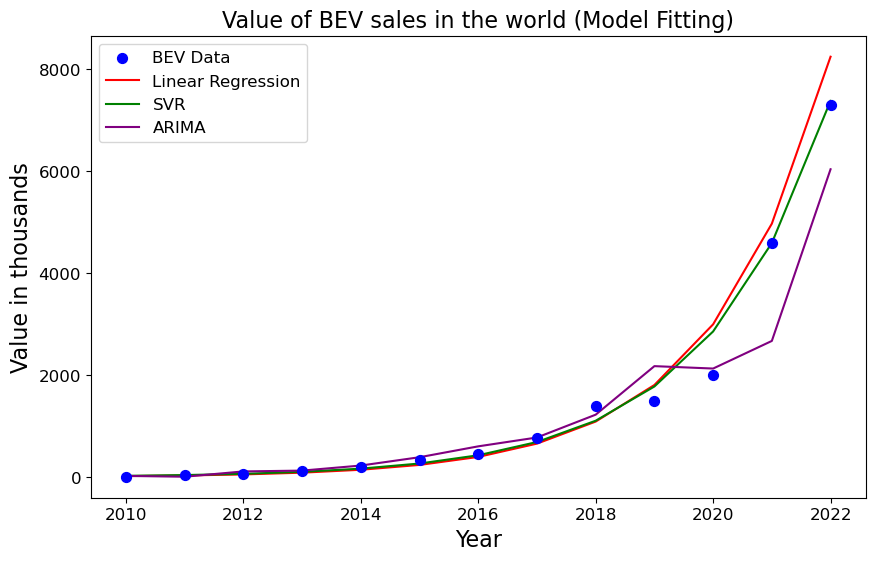

In [56]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('EV_WORLD.csv')
df = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)
df.head(25)

# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev = df_bev.drop(['region', 'powertrain'], axis=1)

# Transform the data
df_bev['log_value'] = df_bev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(df_bev[['year']], df_bev['log_value'])
linear_prediction = np.exp(linear_model.predict(df_bev[['year']]))

# Create and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(df_bev[['year']], df_bev['log_value'])
svr_prediction = np.exp(svr_model.predict(df_bev[['year']]))

# Create and train the ARIMA model
arima_model = ARIMA(df_bev['log_value'], order=(2, 0, 1))
arima_model_fit = arima_model.fit()
arima_prediction = np.exp(arima_model_fit.predict(start=0, end=len(df_bev) - 1))

# Plot all models with log fitting in one graph
plt.figure(figsize=(10, 6))
plt.scatter(df_bev['year'], df_bev['log_value'], color='blue', label='BEV Log Value')
plt.plot(df_bev['year'], linear_model.predict(df_bev[['year']]), color='red', label='Linear Regression')
plt.plot(df_bev['year'], svr_model.predict(df_bev[['year']]), color='green', label='SVR')
plt.plot(df_bev['year'], arima_model_fit.predict(start=0, end=len(df_bev) - 1), color='purple', label='ARIMA')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Log of Value', fontsize=16)
plt.title('Log of BEV sales in the world (Model Fitting)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot the final transformed fitting of all models in one graph
plt.figure(figsize=(10, 6))
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=50, zorder=10, label='BEV Data')
plt.plot(df_bev['year'], linear_prediction / 1000, color='red', label='Linear Regression')
plt.plot(df_bev['year'], svr_prediction / 1000, color='green', label='SVR')
plt.plot(df_bev['year'], arima_prediction / 1000, color='purple', label='ARIMA')
plt.xlabel('Year', fontsize=16)
plt.ylabel('Value in thousands', fontsize=16)
plt.title('Value of BEV sales in the world (Model Fitting)', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



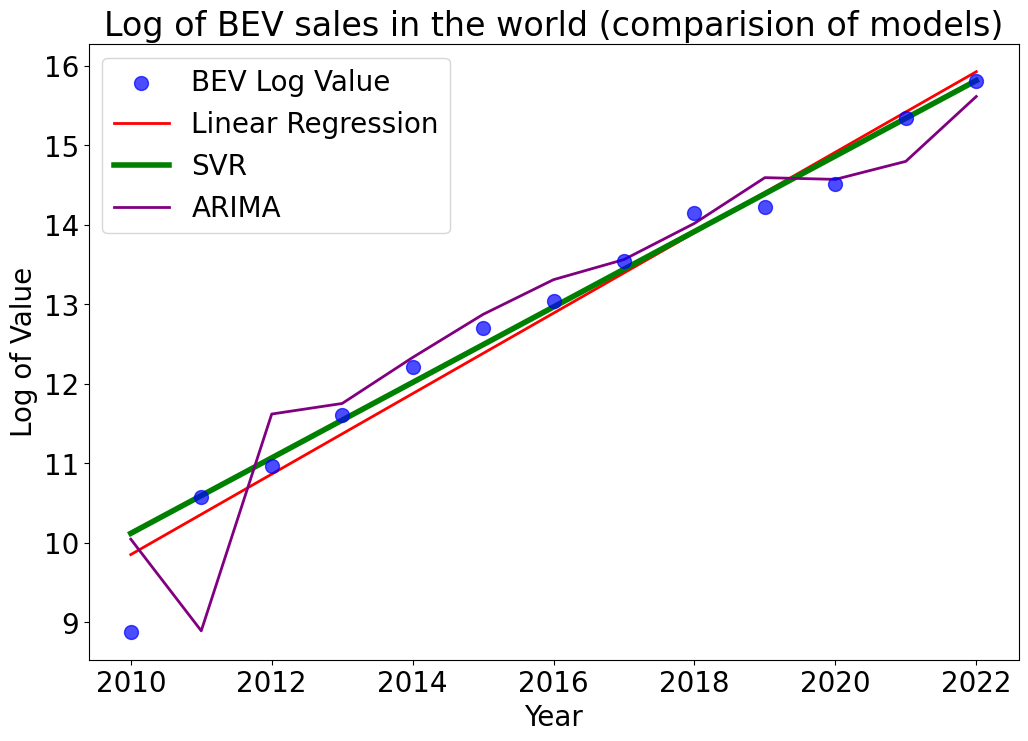

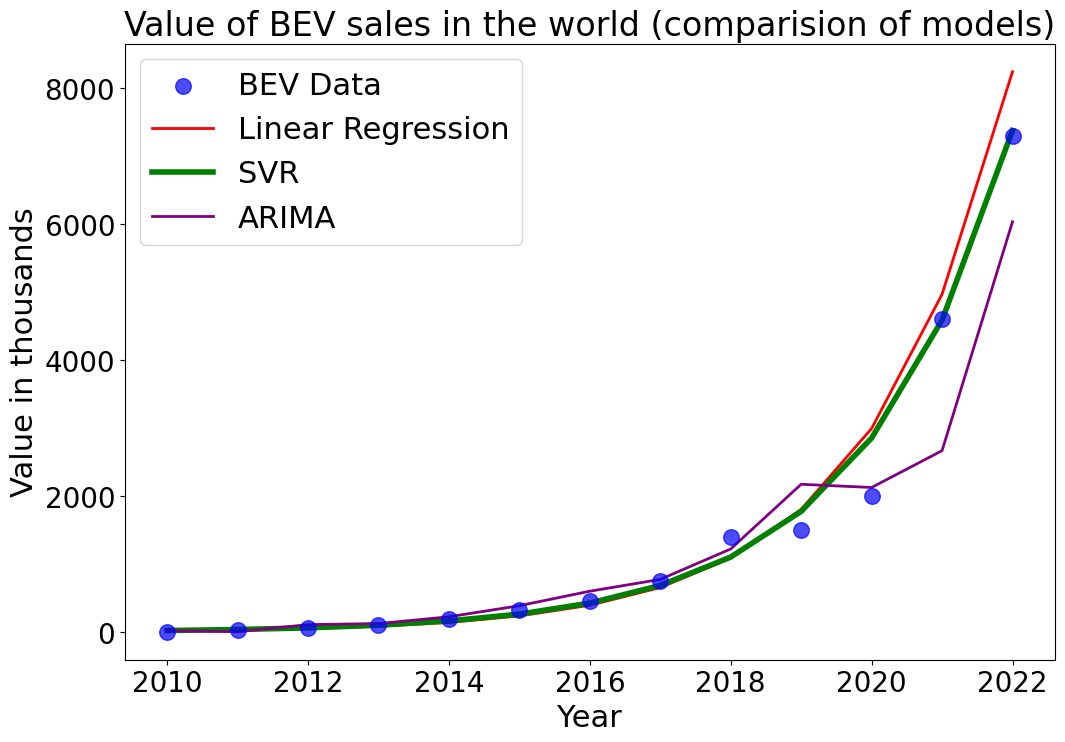

In [36]:
# Plot all models with log fitting in one graph
plt.figure(figsize=(12, 8))
plt.scatter(df_bev['year'], df_bev['log_value'], color='blue', label='BEV Log Value', alpha=0.7, s=100,zorder=100)
plt.plot(df_bev['year'], linear_model.predict(df_bev[['year']]), color='red', label='Linear Regression', linewidth=2)
plt.plot(df_bev['year'], svr_model.predict(df_bev[['year']]), color='green', label='SVR', linewidth=4)
plt.plot(df_bev['year'], arima_model_fit.predict(start=0, end=len(df_bev) - 1), color='purple', label='ARIMA', linewidth=2)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Log of Value', fontsize=20)
plt.title('Log of BEV sales in the world (comparision of models)', fontsize=24)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()

# Plot the final transformed fitting of all models in one graph
plt.figure(figsize=(12, 8))
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=125, zorder=10, label='BEV Data', alpha=0.7)
plt.plot(df_bev['year'], linear_prediction / 1000, color='red', label='Linear Regression', linewidth=2)
plt.plot(df_bev['year'], svr_prediction / 1000, color='green', label='SVR', linewidth=4)
plt.plot(df_bev['year'], arima_prediction / 1000, color='purple', label='ARIMA', linewidth=2)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Value of BEV sales in the world (comparision of models)', fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


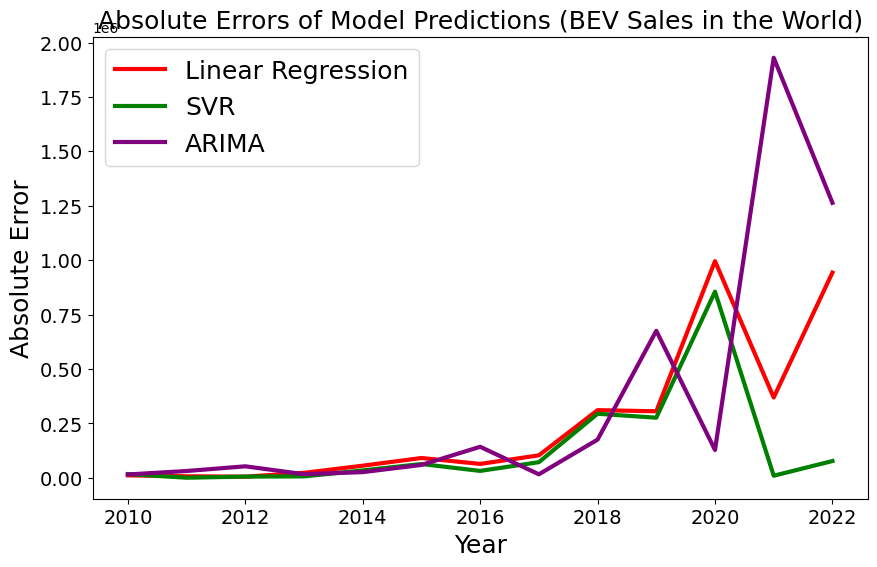

In [55]:
# Calculate the errors for each model
linear_errors = np.abs(linear_prediction - df_bev['value'])
svr_errors = np.abs(svr_prediction - df_bev['value'])
arima_errors = np.abs(arima_prediction - df_bev['value'])

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(df_bev['year'], linear_errors, color='red', label='Linear Regression', linewidth=3)
plt.plot(df_bev['year'], svr_errors, color='green', label='SVR', linewidth=3)
plt.plot(df_bev['year'], arima_errors, color='purple', label='ARIMA', linewidth=3)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Absolute Error', fontsize=18)
plt.title('Absolute Errors of Model Predictions (BEV Sales in the World)', fontsize=18)
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


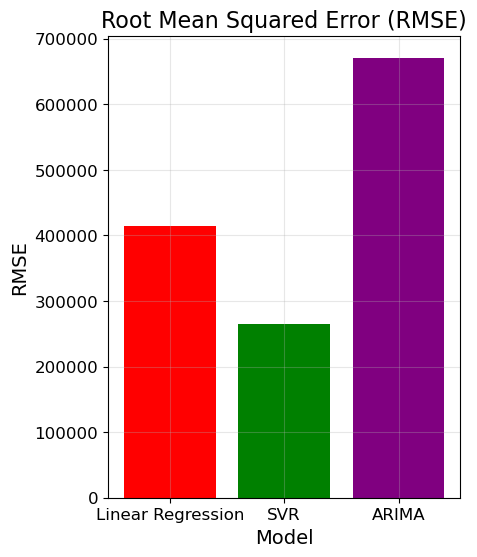

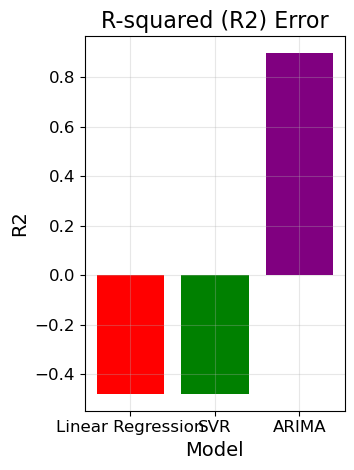

In [41]:
# Calculate RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(df_bev['value'], linear_prediction))
svr_rmse = np.sqrt(mean_squared_error(df_bev['value'], svr_prediction))
arima_rmse = np.sqrt(mean_squared_error(df_bev['value'], arima_prediction))

# Calculate R-squared (R2) for each model
linear_r2 = linear_model.score(df_bev[['year']], df_bev['value'])
svr_r2 = svr_model.score(df_bev[['year']], df_bev['value'])

# Calculate R-squared (R2) for ARIMA manually
tss = np.sum((df_bev['value'] - np.mean(df_bev['value'])) ** 2)
ess = np.sum((arima_prediction - df_bev['value']) ** 2)
arima_r2 = 1 - (ess / tss)

# Plot RMSE and R2
plt.figure(figsize=(10, 6))

# RMSE
plt.subplot(1, 2, 1)
models = ['Linear Regression', 'SVR', 'ARIMA']
rmse_scores = [linear_rmse, svr_rmse, arima_rmse]
plt.bar(models, rmse_scores, color=['red', 'green', 'purple'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Root Mean Squared Error (RMSE)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.show()
# R2
plt.subplot(1, 2, 2)
r2_scores = [linear_r2, svr_r2, arima_r2]
plt.bar(models, r2_scores, color=['red', 'green', 'purple'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2', fontsize=14)
plt.title('R-squared (R2) Error', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()



(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

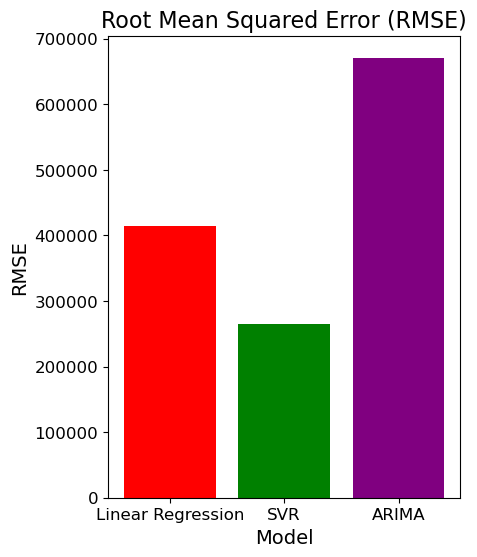

In [49]:
# Calculate RMSE for each model
linear_rmse = np.sqrt(mean_squared_error(df_bev['value'], linear_prediction))
svr_rmse = np.sqrt(mean_squared_error(df_bev['value'], svr_prediction))
arima_rmse = np.sqrt(mean_squared_error(df_bev['value'], arima_prediction))

# Calculate R-squared (R2) for each model
linear_r2 = linear_model.score(df_bev[['year']], df_bev['value'])
svr_r2 = svr_model.score(df_bev[['year']], df_bev['value'])

# Calculate R-squared (R2) for ARIMA manually
ssr = np.sum((df_bev['value'] - arima_prediction) ** 2)
sst = np.sum((df_bev['value'] - np.mean(df_bev['value'])) ** 2)
arima_r2 = 1 - (ssr / sst)

# Plot RMSE and R2
plt.figure(figsize=(10, 6))

# RMSE
plt.subplot(1, 2, 1)
models = ['Linear Regression', 'SVR', 'ARIMA']
rmse_scores = [linear_rmse, svr_rmse, arima_rmse]
plt.bar(models, rmse_scores, color=['red', 'green', 'purple'])
plt.xlabel('Model', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Root Mean Squared Error (RMSE)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)





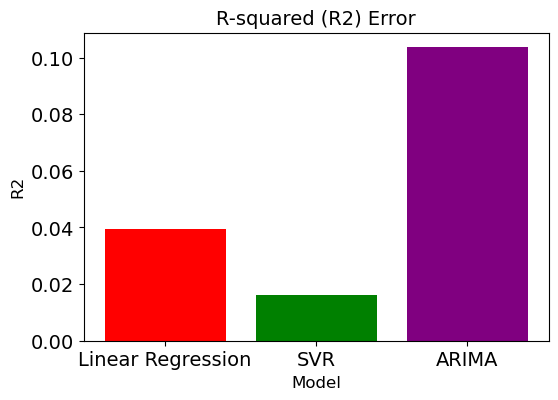

In [51]:
# Calculate R-squared (R2) for each model
linear_r2 = (np.sum((linear_prediction - df_bev['value']) ** 2) / np.sum((df_bev['value'] - np.mean(df_bev['value'])) ** 2))
svr_r2 = (np.sum((svr_prediction - df_bev['value']) ** 2) / np.sum((df_bev['value'] - np.mean(df_bev['value'])) ** 2))
arima_r2 = (np.sum((arima_prediction - df_bev['value']) ** 2) / np.sum((df_bev['value'] - np.mean(df_bev['value'])) ** 2))

# Plot R2
plt.figure(figsize=(6, 4))
models = ['Linear Regression', 'SVR', 'ARIMA']
r2_scores = [linear_r2, svr_r2, arima_r2]
plt.bar(models, r2_scores, color=['red', 'green', 'purple'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2', fontsize=12)
plt.title('R-squared (R2) Error', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\risha\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed t

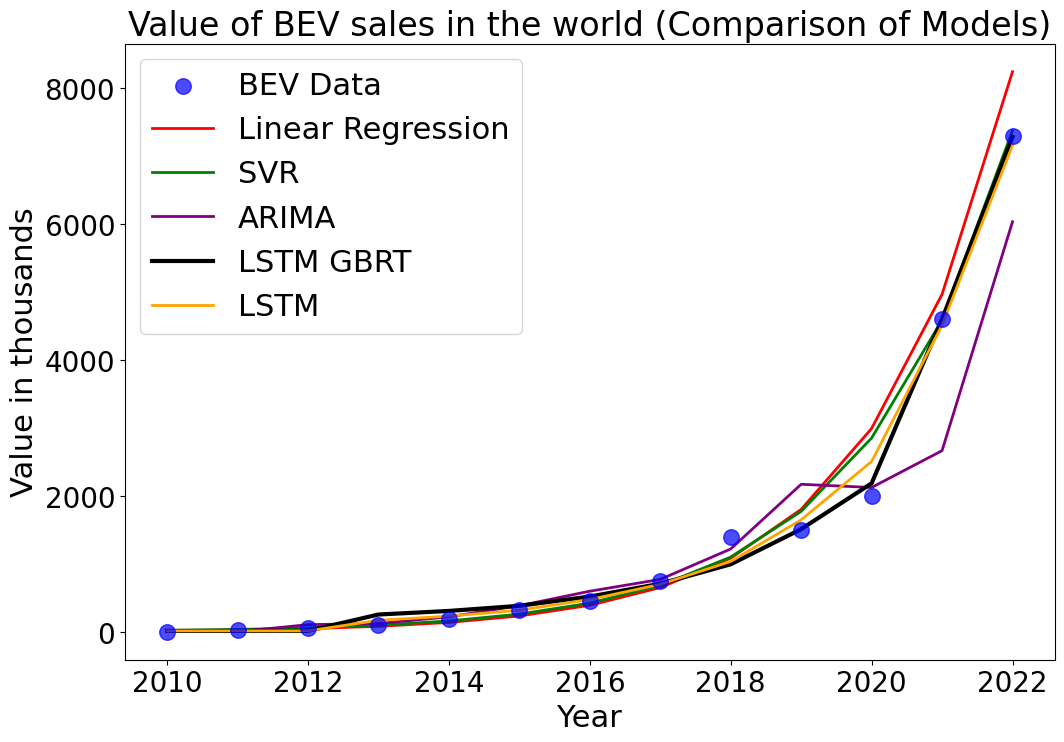

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('EV_WORLD.csv')
df = df.drop(['category', 'parameter', 'mode', 'unit'], axis=1)
df.head(25)

# Create separate datasets for PHEV and BEV
df_phev = df[df['powertrain'] == 'PHEV']
df_bev = df[df['powertrain'] == 'BEV']
df_bev = df_bev.drop(['region', 'powertrain'], axis=1)

# Transform the data
df_bev['log_value'] = df_bev['value'].apply(lambda x: np.log(x))

# Create and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(df_bev[['year']], df_bev['log_value'])
linear_prediction = np.exp(linear_model.predict(df_bev[['year']]))

# Create and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(df_bev[['year']], df_bev['log_value'])
svr_prediction = np.exp(svr_model.predict(df_bev[['year']]))

# Create and train the ARIMA model
arima_model = ARIMA(df_bev['log_value'], order=(2, 0, 1))
arima_model_fit = arima_model.fit()
arima_prediction = np.exp(arima_model_fit.predict(start=0, end=len(df_bev) - 1))


lstm = np.array([[ 20000],[ 20000 ],[ 20000],[ 175379.25],[ 236376.4 ],[ 323235.78],[ 481566.6 ],[ 703933.75],[1040177.56],[1652473.1 ],[2510458.  ],[4514949.5 ],[7159071.  ]])
actual_values = df['value'].values[-len(lstm):]


lstm_GBRT = np.array([ 20000, 20000, 20000,260135.55, 312902.03, 388348.2, 524439.9, 712880.6, 998281.7, 1515639.2, 2189442.5, 4604273.5, 7284428.5])
actual_values = df['value'].values[-len(lstm_GBRT):]

# Plot the final transformed fitting of all models in one graph
plt.figure(figsize=(12, 8))
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=125, zorder=10, label='BEV Data', alpha=0.7)
plt.plot(df_bev['year'], linear_prediction / 1000, color='red', label='Linear Regression', linewidth=2)
plt.plot(df_bev['year'], svr_prediction / 1000, color='green', label='SVR', linewidth=2)
plt.plot(df_bev['year'], arima_prediction / 1000, color='purple', label='ARIMA', linewidth=2)
plt.plot(df_bev['year'], lstm_GBRT / 1000, color='black', label='LSTM GBRT', linewidth=3)
plt.plot(df_bev['year'], lstm / 1000, color='orange', label='LSTM', linewidth=2)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Value of BEV sales in the world (Comparison of Models)', fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()


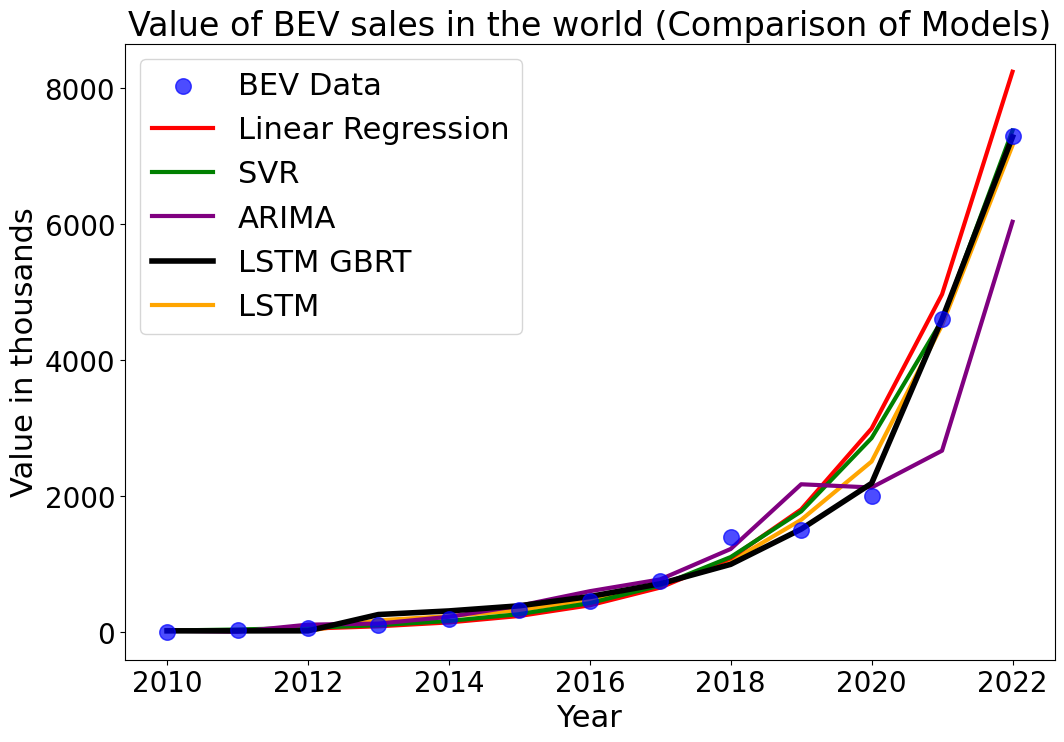

In [26]:
# Plot the final transformed fitting of all models in one graph
plt.figure(figsize=(12, 8))
plt.scatter(df_bev['year'], df_bev['value'] / 1000, color='blue', marker='o', s=125, zorder=50, label='BEV Data', alpha=0.7)
plt.plot(df_bev['year'], linear_prediction / 1000, color='red', label='Linear Regression', linewidth=3)
plt.plot(df_bev['year'], svr_prediction / 1000, color='green', label='SVR', linewidth=3)
plt.plot(df_bev['year'], arima_prediction / 1000, color='purple', label='ARIMA', linewidth=3)
plt.plot(df_bev['year'], lstm_GBRT / 1000, color='black', label='LSTM GBRT', linewidth=4,)
plt.plot(df_bev['year'], lstm / 1000, color='orange', label='LSTM', linewidth=3,zorder=1)

plt.xlabel('Year', fontsize=22)
plt.ylabel('Value in thousands', fontsize=22)
plt.title('Value of BEV sales in the world (Comparison of Models)', fontsize=24)
plt.legend(fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.show()
